In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2

In [2]:
image_size = [224, 224]


In [3]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)

58889256/58889256 [==============================] - 2s 0us/step


In [9]:
!unzip '/content/Brain_CSD (1).zip'

Archive:  /content/Brain_CSD (1).zip
   creating: Brain_CSD/No_tumor/
  inflating: Brain_CSD/No_tumor/1.jpg  
  inflating: Brain_CSD/No_tumor/2.jpg  
  inflating: Brain_CSD/No_tumor/3.jpg  
  inflating: Brain_CSD/No_tumor/4.jpg  
  inflating: Brain_CSD/No_tumor/5.jpg  
  inflating: Brain_CSD/No_tumor/6.jpg  
  inflating: Brain_CSD/No_tumor/7.jpg  
  inflating: Brain_CSD/No_tumor/8.jpg  
  inflating: Brain_CSD/No_tumor/image (10).jpg  
  inflating: Brain_CSD/No_tumor/image (11).jpg  
  inflating: Brain_CSD/No_tumor/image (12).jpg  
  inflating: Brain_CSD/No_tumor/image (13).jpg  
  inflating: Brain_CSD/No_tumor/image (14).jpg  
  inflating: Brain_CSD/No_tumor/image (15).jpg  
  inflating: Brain_CSD/No_tumor/image (16).jpg  
  inflating: Brain_CSD/No_tumor/image (17).jpg  
  inflating: Brain_CSD/No_tumor/image (18).jpg  
  inflating: Brain_CSD/No_tumor/image (19).jpg  
  inflating: Brain_CSD/No_tumor/image (2).jpg  
  inflating: Brain_CSD/No_tumor/image (20).jpg  
  inflating: Brain_CSD/

In [13]:
for layer in vgg.layers:
    layer.trainable = False

In [16]:
brain_classes = []
individual_disease = []
image_paths = []
labels = []

for images in os.listdir('/content/Brain_CSD'):
    for image in os.listdir('/content/Brain_CSD/' + str(images)):
        individual_disease.append('/content/Brain_CSD/' + str(images) + '/' + str(image))
        labels.append(images)
        print(images)
        path=('/content/Brain_CSD/' + str(images) + '/' + str(image))
        img = cv2.imread(path)
        im =cv2.resize(img,(224,224))
        image_paths.append(im)
    brain_classes.append(individual_disease)
    individual_disease = []
print("Labels:", labels)

pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitary_tumor
pituitar

In [17]:
d=2

In [18]:
x = Flatten()(vgg.output)

In [19]:
prediction = Dense(1, activation = 'sigmoid')(x)


In [20]:
model = Model(inputs = vgg.input, outputs = prediction)


In [21]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [22]:
data_arr = np.array(image_paths)
label_arr = np.array(labels)

In [34]:
len(label_arr)

1401

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y= encoder.fit_transform(label_arr)
x= data_arr

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=30)

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,  # Degree range for random rotations
    width_shift_range=0.2,  # Fraction of total width for random horizontal shifts
    height_shift_range=0.2,  # Fraction of total height for random vertical shifts
    shear_range=0.2,  # Shear intensity (shear angle in radians)
    zoom_range=0.2,  # Range for random zoom
    horizontal_flip=True,  # Randomly flip inputs horizontally
    vertical_flip=True,  # Randomly flip inputs vertically
    fill_mode='nearest'  # Strategy for filling in newly created pixels after rotations or shifts
)


In [42]:
len(x_train)

980

In [43]:

datagen.fit(x_train)



In [44]:

augmented_data_generator = datagen.flow(x_train, y_train, batch_size=32)

In [45]:
augmented_data_generator

In [49]:
mod = model.fit(
  augmented_data_generator,
  validation_data=(x_test, y_test),
  verbose=1,
  epochs=5)


Epoch 1/5
31/31 [==============================] - 15s 489ms/step - loss: 0.3083 - accuracy: 0.9837 - val_loss: 0.7124 - val_accuracy: 0.9644
Epoch 2/5
31/31 [==============================] - 15s 484ms/step - loss: 0.2556 - accuracy: 0.9857 - val_loss: 0.4638 - val_accuracy: 0.9667
Epoch 3/5
31/31 [==============================] - 15s 480ms/step - loss: 0.7743 - accuracy: 0.9612 - val_loss: 0.3347 - val_accuracy: 0.9786
Epoch 4/5
31/31 [==============================] - 15s 483ms/step - loss: 0.7594 - accuracy: 0.9684 - val_loss: 0.9863 - val_accuracy: 0.9644
Epoch 5/5
31/31 [==============================] - 15s 485ms/step - loss: 0.3596 - accuracy: 0.9755 - val_loss: 0.4409 - val_accuracy: 0.9715


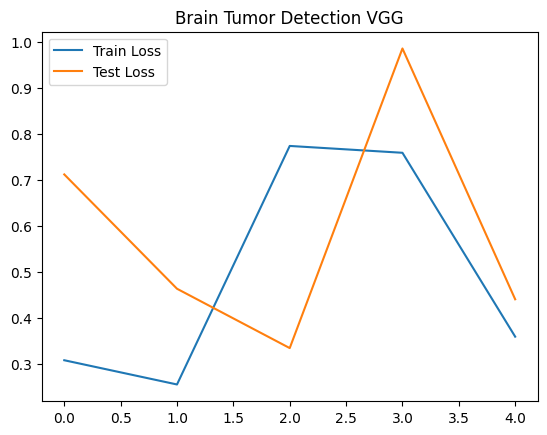

In [50]:
plt.plot(mod.history['loss'], label='Train Loss')
plt.plot(mod.history['val_loss'], label='Test Loss')
plt.title("Brain Tumor Detection VGG")
plt.legend()
plt.show()

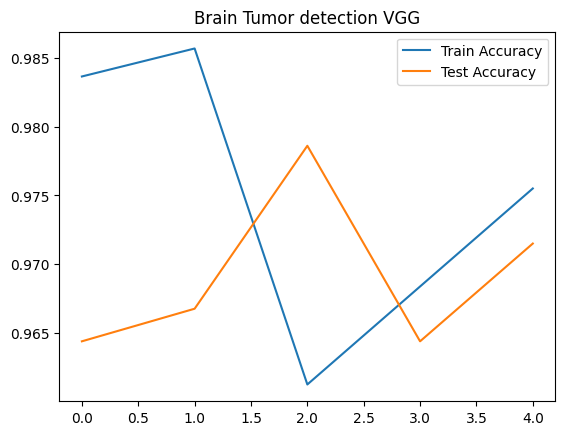

In [51]:
plt.plot(mod.history['accuracy'], label='Train Accuracy')
plt.plot(mod.history['val_accuracy'], label='Test Accuracy')
plt.title("Brain Tumor detection VGG")
plt.legend()
plt.show()

In [52]:
y_pred=model.predict(x_test)

14/14 [==============================] - 2s 113ms/step


In [53]:
y_pred

array([[0.0000000e+00],
       [6.4284126e-18],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [2.6069725e-25],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.6292467e-14],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.000000

In [55]:
y_pred=np.argmax(y_pred,axis=1)

In [56]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,y_pred,labels=np.unique(y_test)))

              precision    recall  f1-score   support

           0       0.39      1.00      0.57       166
           1       0.00      0.00      0.00       255

    accuracy                           0.39       421
   macro avg       0.20      0.50      0.28       421
weighted avg       0.16      0.39      0.22       421



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
